In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from utils.df_loader import (
    load_adult_df,
    load_compas_df,
    load_german_df,
    load_diabetes_df,
    load_breast_cancer_df,
)
from sklearn.model_selection import train_test_split
from utils.preprocessing import preprocess_df
from utils.models import (
    train_models,
    evaluation_test,
    save_models,
    load_models,
)

from art.attacks.evasion import DeepFool, CarliniL0Method, CarliniLInfMethod, CarliniL2Method, BoundaryAttack, LowProFool
from art.estimators.classification import SklearnClassifier, KerasClassifier

from utils.preprocessing import DfInfo
from utils.preprocessing import inverse_dummy
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

seed = 42
# tf.random.set_seed(seed)
# np.random.seed(seed)

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None # suppress "SettingWithCopyWarning" warning

In [3]:
TRAIN_MODEL = False # (1)True(2)False
RUN_ART = True
num_instances = 64 # (1)&(2) 20

if RUN_ART:
    tf.compat.v1.disable_eager_execution()

print("TF version: ", tf.__version__)
print("Eager execution enabled: ", tf.executing_eagerly())  # False    

TF version:  2.10.0
Eager execution enabled:  False


In [13]:
def get_feature_importance(models, df_info, dataset_name):

    if dataset_name == 'adult':
        plt.figure(figsize=(6,18))
    elif dataset_name == "german":
        plt.figure(figsize=(6,13))
    else: 
        plt.figure(figsize=(6,6))
    
    weights = models['lr'].coef_
    name = df_info.ohe_feature_names

    data = {'name': name, 'weights': weights[0], }
    df = pd.DataFrame(data)
    df = df.sort_values(by='weights', ascending=False)

    sns.set_theme(style="whitegrid")
    # clrs = ['grey' if (x < max(weights[0])) else 'red' for x in weights[0] ]

    sns.set_color_codes("pastel")
    sns.barplot(x="weights", y="name", data=df, color='b').set(title=f'Logistic Regression Feature Importance - {dataset_name}')
    plt.show()



c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


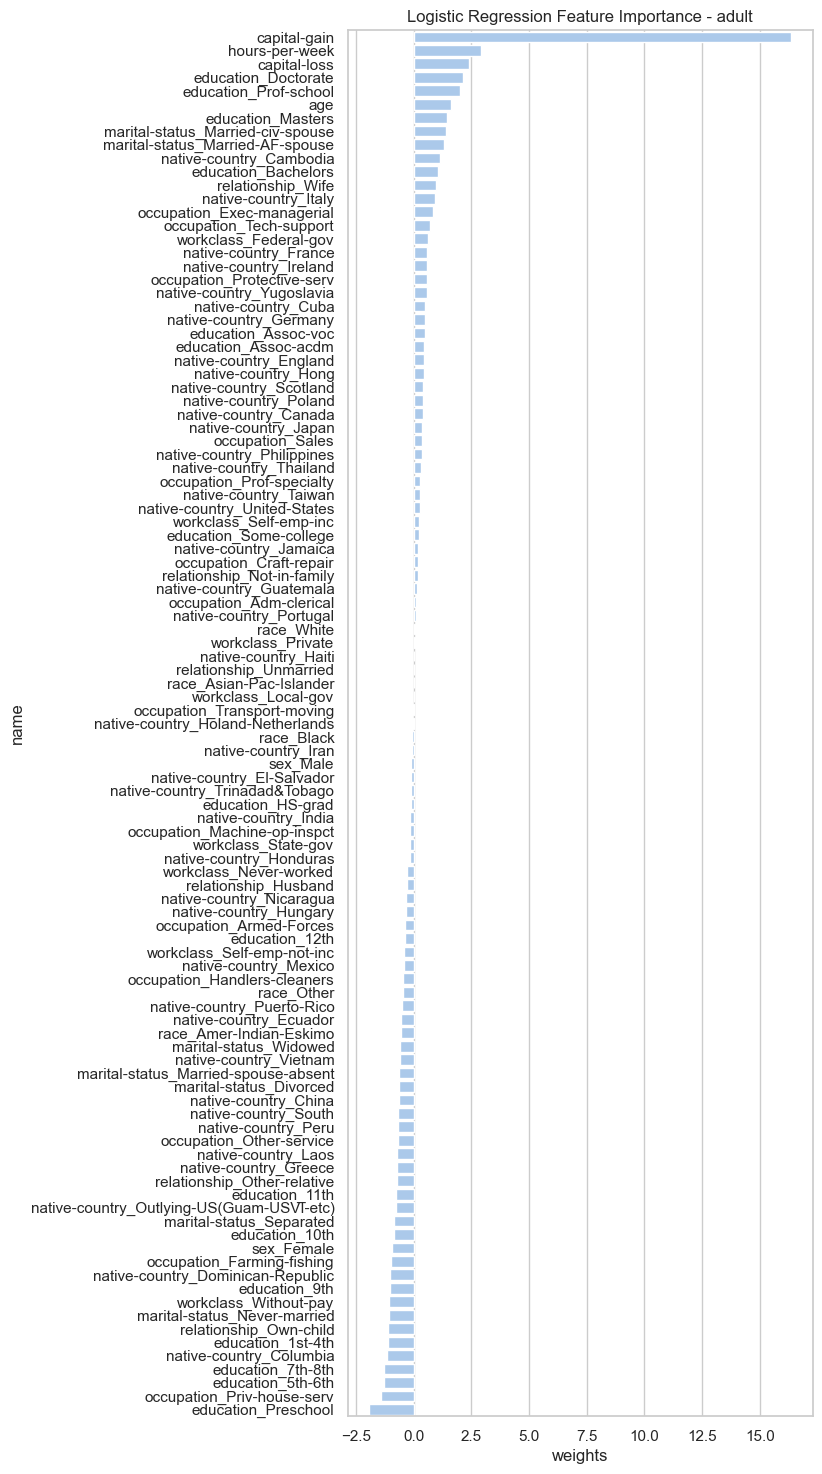

In [14]:
df_info = preprocess_df(load_adult_df)
models = load_models(len(df_info.ohe_feature_names), "adult")
get_feature_importance(models,df_info,"adult")

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


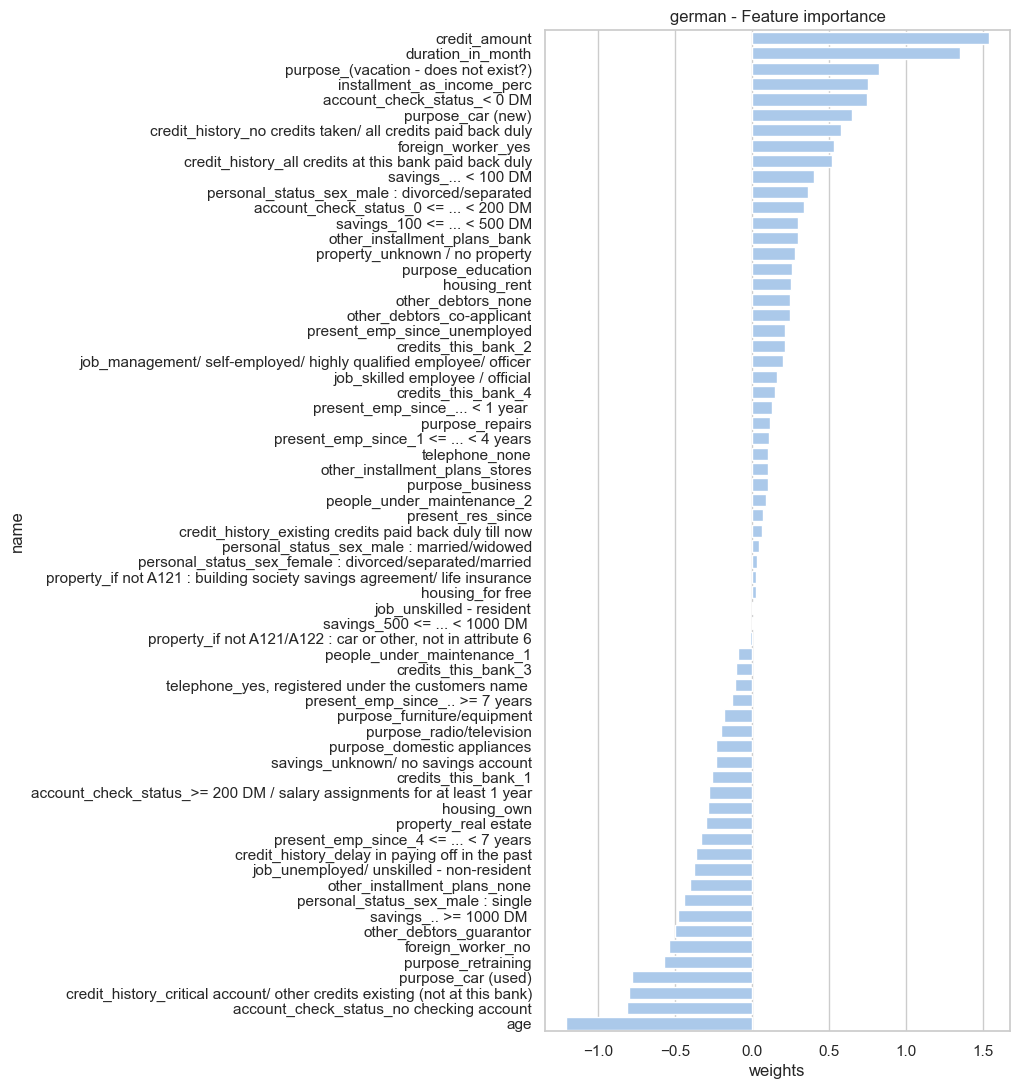

In [81]:
df_info = preprocess_df(load_german_df)
models = load_models(len(df_info.ohe_feature_names), "german")
get_feature_importance(models,df_info,"german")

In [15]:
df_info = preprocess_df(load_compas_df)
models = load_models(len(df_info.ohe_feature_names), "COMPAS")
# get_feature_importance(models,df_info,"compas")

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [16]:
weights = models['lr'].coef_
name = df_info.ohe_feature_names

data = {'name': name, 'weights': weights[0], }
df = pd.DataFrame(data)
df = df.sort_values(by='weights', ascending=False)
df

,name,weights
0,age,4.404059
14,race_Other,0.774435
10,race_Asian,0.370210
12,race_Hispanic,0.341835
21,two_year_recid_0,0.239549
5,age_cat_Greater than 45,0.201613
19,is_violent_recid_0,0.197139
4,age_cat_25 - 45,0.168339
16,c_charge_degree_M,0.122757
11,race_Caucasian,0.076076


In [19]:
df_info = preprocess_df(load_diabetes_df)
models = load_models(len(df_info.ohe_feature_names), "diabetes")
# get_feature_importance(models,df_info,"diabetes")
weights = models['lr'].coef_
name = df_info.ohe_feature_names

data = {'name': name, 'weights': weights[0], }
df = pd.DataFrame(data)
df = df.sort_values(by='weights', ascending=False)
df

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


,name,weights
1,Glucose,4.379222
5,BMI,3.322403
7,Age,1.716746
6,DiabetesPedigreeFunction,1.130981
0,Pregnancies,0.961842
3,SkinThickness,0.267824
4,Insulin,-0.275877
2,BloodPressure,-0.563079


c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


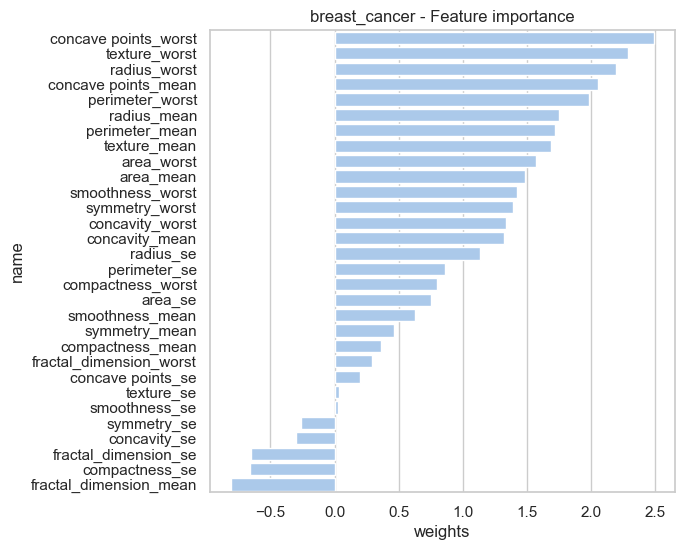

In [88]:
df_info = preprocess_df(load_breast_cancer_df)
models = load_models(len(df_info.ohe_feature_names), "breast_cancer")
get_feature_importance(models,df_info,"breast_cancer")